In [7]:
import sys
sys.path.append("./YOLOBackBones")
import numpy as np
from keras_cv import visualization
from data.prepate_data import run_data_preparation_pipeline
from models.csp_darknet import create_xs_csp_darknet_yolov8
from models.ghostnet_v2 import create_0_5_ghostnet_yolov8
from models.shufflenet_v2 import create_0_5_shufflenet_yolov8

from keras.callbacks import CSVLogger
from profiling.coco_metric_callback import EvaluateCOCOMetricsCallback


In [24]:
def visualize_detections(dataset, model=None, bounding_box_format="xyxy"):
    images, y_true = next(iter(dataset.take(1)))
    y_pred = None
    if model:
        y_pred = model.predict(images)
    visualization.plot_bounding_box_gallery(
        images,
        value_range=(0, 255),
        bounding_box_format=bounding_box_format,
        y_true=y_true,
        y_pred=y_pred if y_pred is not None else y_pred,
        scale=4,
        rows=2,
        cols=2,
        show=True,
        font_scale=0.7,
        class_mapping=cat_mapping,
    )

In [17]:
gathered_data = run_data_preparation_pipeline()

Path to dataset files: /Users/bsintsov/.cache/kagglehub/datasets/trainingdatapro/cars-video-object-tracking/versions/3


In [10]:
train_ds, val_ds = gathered_data['train_ds'], gathered_data['val_ds']
cat_mapping_r = gathered_data['cat_mapping_r']
cat_mapping = gathered_data['cat_mapping']

In [22]:
num_classes = 2
input_shape = (640, 640, 3)

BATCH_SIZE = 4
LEARNING_RATE = 0.001
EPOCH = 5
GLOBAL_CLIPNORM = 10.0

In [12]:
model_shuffle = create_0_5_shufflenet_yolov8(num_classes=num_classes, input_shape=input_shape)
csp_darknet_yolo = create_xs_csp_darknet_yolov8(num_classes=num_classes)
ghost_model = create_0_5_ghostnet_yolov8(num_classes=num_classes, input_shape=input_shape)

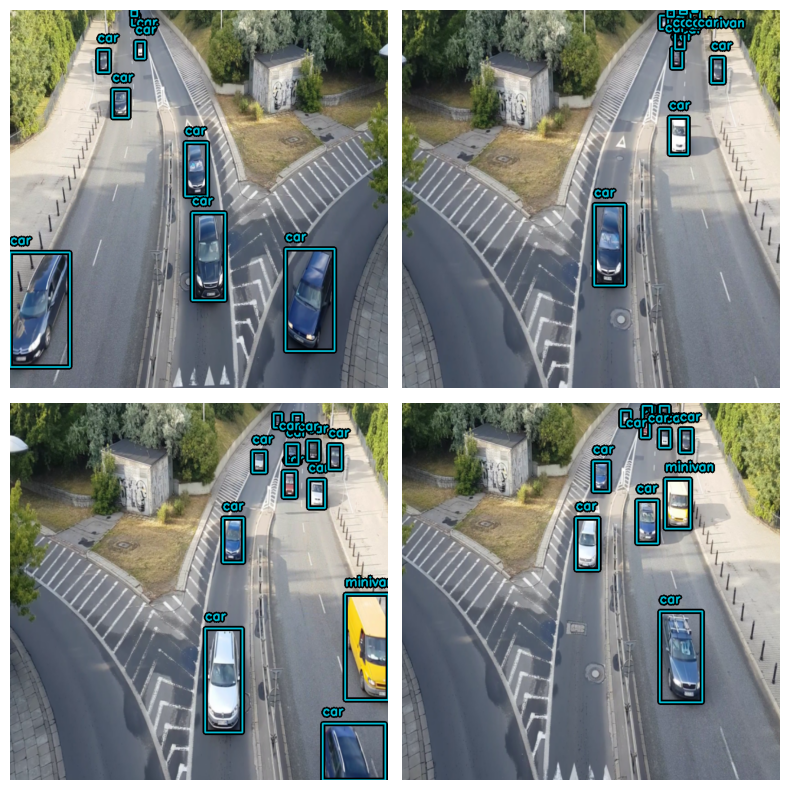

In [25]:
visualize_detections(
    train_ds, bounding_box_format="xyxy"
)

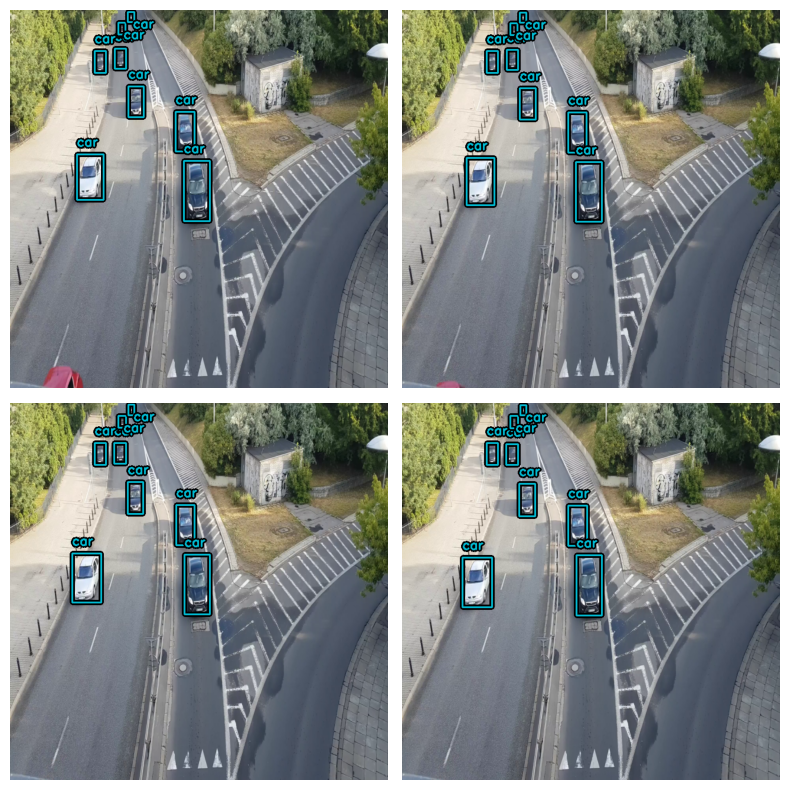

In [26]:
visualize_detections(
    val_ds, bounding_box_format="xyxy"
)

In [27]:
model_shuffle.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCH,
    batch_size=BATCH_SIZE,
    callbacks=[
        EvaluateCOCOMetricsCallback(val_ds, "best_csp_darknet_yolo.keras"),
        CSVLogger("csp_darknet_yolo.csv", separator=",", append=False)
      ],

)

Epoch 1/5
18/60 ━━━━━━━━━━━━━━━━━━━━ 1:25 2s/step - box_loss: 4.3149 - class_loss: 394.8597 - loss: 399.1746

KeyboardInterrupt: 